# Frage 5: Wie wurden die Folgen der Miniserie “Das Damengambit” im Durchschnitt bewertet?

In [18]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Speichern der benötigten URL's
url_data_ratings = "https://datasets.imdbws.com/title.ratings.tsv.gz" 
url_data_episodes = "https://datasets.imdbws.com/title.episode.tsv.gz"
url_data_information = "https://datasets.imdbws.com/title.akas.tsv.gz"

In [3]:
# Zusammenfassen der benötigten Daten (Name der Datei, URL)
title_episode_file = "title_episode.tsv.gz", url_data_episodes
title_ratings_file = "title_ratings.tsv.gz", url_data_ratings
title_information_file = "title.akas.tsv.gz", url_data_information

In [4]:
# Impotieren der Daten (downloaden der Daten auf lokalem Gerät)
urllib.request.urlretrieve(title_ratings_file[1], title_ratings_file[0])
urllib.request.urlretrieve(title_episode_file[1], title_episode_file[0])
urllib.request.urlretrieve(title_information_file[1], title_information_file[0])

('title.akas.tsv.gz', <http.client.HTTPMessage at 0x288b9016af0>)

In [5]:
# Auslesen der Informationen zu den Bewertungen und Speicherung in Variable
ratings = pd.read_csv(title_ratings_file[0], compression='gzip', sep = "\t") 
# Dtype warnung aufgrund unterschiedlicher Datentypen im Datensatz

In [6]:
# Auslesen der Informationen zu den Episoden und Speicherung in Variable
episodes = pd.read_csv(title_episode_file[0], compression='gzip', sep = "\t") 
# Dtype warnung aufgrund unterschiedlicher Datentypen im Datensatz

In [7]:
# Auslesen der Informationen zu der Serie und Speicherung in Variable
information = pd.read_csv(title_information_file[0], compression='gzip', sep = "\t") 
# Dtype warnung aufgrund unterschiedlicher Datentypen im Datensatz

C:\Users\DenniSandra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Suche nach Serie im Datensatz
titlename = information[information["title"] == "Das Damengambit"]
# Extraktion des Titelidentifikationsnummer 
# (wird benötigt um relevante Informationen der Serie in den anderen Datensätzen zu identifizieren)
# Dabei ist zu beachten, dass die Titel ID alle Ländererscheinungen umfasst.
title = titlename.titleId.iloc[0]

In [9]:
title

'tt10048342'

In [10]:
# Rausfiltern der benötigten Episodenidentifikationsnummer 
# anhand der Serienidentifikationsnummer
episode_Damengambit = episodes[episodes["parentTconst"] == "tt10048342"]
episode_Damengambit

,tconst,parentTconst,seasonNumber,episodeNumber
468334,tt10062310,tt10048342,1,1
468335,tt10062312,tt10048342,1,2
468336,tt10062314,tt10048342,1,3
468338,tt10062318,tt10048342,1,4
468340,tt10062320,tt10048342,1,5
468341,tt10062322,tt10048342,1,6
1795556,tt12984026,tt10048342,1,7


In [11]:
# Allgemeine Bewertung der Serie
rating_Damengambit = ratings[ratings["tconst"] == "tt10048342"]
rating_Damengambit

,tconst,averageRating,numVotes
453905,tt10048342,8.6,410900


In [13]:
rating_episode_DG = []
i = 0
n = len(episode_Damengambit)
while i < n:
    buffer_ratings = ratings[ratings["tconst"] == episode_Damengambit.tconst.iloc[i]]
    rating_episode_DG.append(buffer_ratings)
    print("Folge: " , i+1, "\n",  rating_episode_DG[i], "\n")
    i = i + 1

Folge:  1 
             tconst  averageRating  numVotes
454449  tt10062310            8.4     10718 

Folge:  2 
             tconst  averageRating  numVotes
454450  tt10062312            8.7      9989 

Folge:  3 
             tconst  averageRating  numVotes
454451  tt10062314            8.4      9051 

Folge:  4 
             tconst  averageRating  numVotes
454452  tt10062318            8.4      8785 

Folge:  5 
             tconst  averageRating  numVotes
454453  tt10062320            8.2      8516 

Folge:  6 
             tconst  averageRating  numVotes
454454  tt10062322            8.4      8606 

Folge:  7 
             tconst  averageRating  numVotes
598667  tt12984026            9.2     11721 



In [14]:
episode_Damengambit

,tconst,parentTconst,seasonNumber,episodeNumber
468334,tt10062310,tt10048342,1,1
468335,tt10062312,tt10048342,1,2
468336,tt10062314,tt10048342,1,3
468338,tt10062318,tt10048342,1,4
468340,tt10062320,tt10048342,1,5
468341,tt10062322,tt10048342,1,6
1795556,tt12984026,tt10048342,1,7


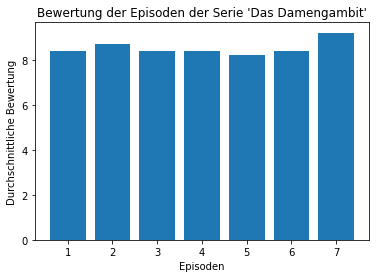

[10718, 9989, 9051, 8785, 8516, 8606, 11721]

In [129]:
# Verteilung der Balken auf der x-Achse
x_axis = [1, 2, 3, 4, 5, 6, 7]

# Höhe der Balken
rating = [rating_episode_DG[0].iloc[0,1], rating_episode_DG[1].iloc[0,1], rating_episode_DG[2].iloc[0,1], rating_episode_DG[3].iloc[0,1], rating_episode_DG[4].iloc[0,1], rating_episode_DG[5].iloc[0,1], rating_episode_DG[6].iloc[0,1]]

# Balkendiagramm plotten
plt.bar(x_axis, rating, width = 0.8)

# Beschriftung plot
plt.xlabel("Episoden")
plt.ylabel("Durchschnittliche Bewertung")
plt.title("Bewertung der Episoden der Serie 'Das Damengambit'")

# Plot anzeigen
plt.show()
label